importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


loading the data

In [2]:
df=pd.read_csv("customer_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
#cleaning the data
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

from the above inference there are some columns where they can be converted in to binary

In [5]:
for item in df.columns:
    print(item)
    print(df[item].unique())

customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
gender
['Female' 'Male']
SeniorCitizen
[0 1]
Partner
['Yes' 'No']
Dependents
['No' 'Yes']
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService
['No' 'Yes']
MultipleLines
['No phone service' 'No' 'Yes']
InternetService
['DSL' 'Fiber optic' 'No']
OnlineSecurity
['No' 'Yes' 'No internet service']
OnlineBackup
['Yes' 'No' 'No internet service']
DeviceProtection
['No' 'Yes' 'No internet service']
TechSupport
['No' 'Yes' 'No internet service']
StreamingTV
['No' 'Yes' 'No internet service']
StreamingMovies
['No' 'Yes' 'No internet service']
Contract
['Month-to-month' 'One year' 'Two year']
PaperlessBilling
['Yes' 'No']
PaymentMethod
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (a

In [7]:
#now there are string in the coloumns so we are going to convert in to lowercase
for item in df.columns:
    try:
        df[item]=df[item].str.lower()
    except:
        print(item,"cannot be converted")

df.head()


SeniorCitizen cannot be converted
tenure cannot be converted
MonthlyCharges cannot be converted


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,yes,no,1,no,no phone service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic check,29.85,29.85,no
1,5575-gnvde,male,0,no,no,34,yes,no,dsl,yes,...,yes,no,no,no,one year,no,mailed check,56.95,1889.5,no
2,3668-qpybk,male,0,no,no,2,yes,no,dsl,yes,...,no,no,no,no,month-to-month,yes,mailed check,53.85,108.15,yes
3,7795-cfocw,male,0,no,no,45,no,no phone service,dsl,yes,...,yes,yes,no,no,one year,no,bank transfer (automatic),42.30,1840.75,no
4,9237-hqitu,female,0,no,no,2,yes,no,fiber optic,no,...,no,no,no,no,month-to-month,yes,electronic check,70.70,151.65,yes


In [8]:
#converting all yes or no to "0"&"1"
columns_to_convert=["Partner","Dependents","PhoneService","PaperlessBilling",'Churn']
for item in columns_to_convert:
    df[item].replace(to_replace='yes',value=1,inplace=True)
    df[item].replace(to_replace='no',value=0,inplace=True)

In [9]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-vhveg,female,0,1,0,1,0,no phone service,dsl,no,...,no,no,no,no,month-to-month,1,electronic check,29.85,29.85,0
1,5575-gnvde,male,0,0,0,34,1,no,dsl,yes,...,yes,no,no,no,one year,0,mailed check,56.95,1889.5,0
2,3668-qpybk,male,0,0,0,2,1,no,dsl,yes,...,no,no,no,no,month-to-month,1,mailed check,53.85,108.15,1
3,7795-cfocw,male,0,0,0,45,0,no phone service,dsl,yes,...,yes,yes,no,no,one year,0,bank transfer (automatic),42.30,1840.75,0
4,9237-hqitu,female,0,0,0,2,1,no,fiber optic,no,...,no,no,no,no,month-to-month,1,electronic check,70.70,151.65,1


In [10]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [12]:
#Total charges are in object by converting it in to float
df['TotalCharges']=df['TotalCharges'].replace(r'\s+',np.nan,regex=True)
df['TotalCharges']=pd.to_numeric
(df['TotalCharges'])

0       <function to_numeric at 0x000001BDA3AAE550>
1       <function to_numeric at 0x000001BDA3AAE550>
2       <function to_numeric at 0x000001BDA3AAE550>
3       <function to_numeric at 0x000001BDA3AAE550>
4       <function to_numeric at 0x000001BDA3AAE550>
                           ...                     
7038    <function to_numeric at 0x000001BDA3AAE550>
7039    <function to_numeric at 0x000001BDA3AAE550>
7040    <function to_numeric at 0x000001BDA3AAE550>
7041    <function to_numeric at 0x000001BDA3AAE550>
7042    <function to_numeric at 0x000001BDA3AAE550>
Name: TotalCharges, Length: 7043, dtype: object

In [14]:
#checking for null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df=df.fillna(value=0)

In [19]:
#checking for the balancing problem
churners_number=len(df[df['Churn']==1])
print("Number of churners",churners_number)
churners=(df[df['Churn']==1])
non_churners=df[df['Churn']==0].sample(n=churners_number)
print("Number of non-churners",len(non_churners))
df2=churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


In [20]:
#checking forcorrelation
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.156530,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,-0.014877,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.111377,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.006152,0.247900,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,0.016505,0.247398,0.011942
PaperlessBilling,0.156530,-0.014877,-0.111377,0.006152,0.016505,1.000000,0.352150,0.191825
MonthlyCharges,0.220173,0.096848,-0.113890,0.247900,0.247398,0.352150,1.000000,0.193356
Churn,0.150889,-0.150448,-0.164221,-0.352229,0.011942,0.191825,0.193356,1.000000


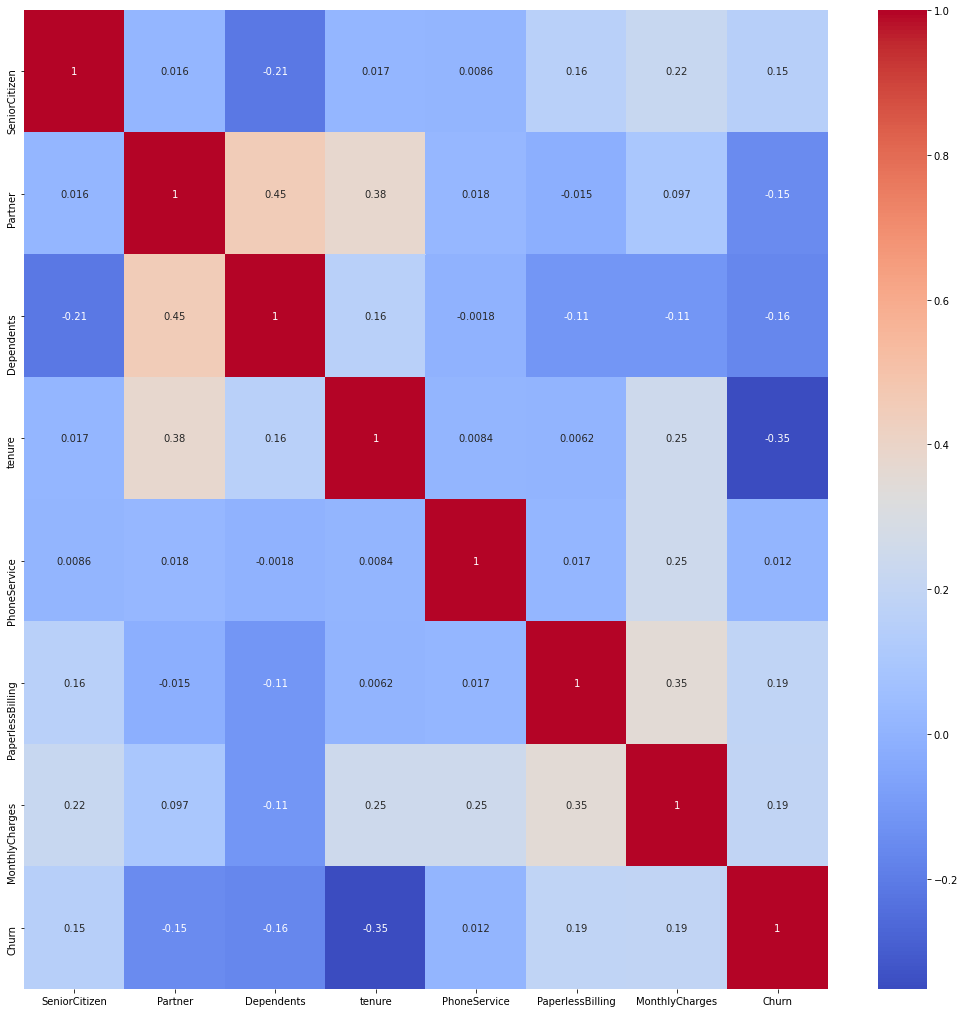

In [26]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show()

now we are creating the classifier and remove customer_id

In [30]:
try:
    customer_id=df2['customerID']
    del df2['customerID']
except:
        print("already removed customerID")

In [31]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2,male,0,0,0,2,1,no,dsl,yes,yes,no,no,no,no,month-to-month,1,mailed check,53.85,<function to_numeric at 0x000001BDA3AAE550>,1
4,female,0,0,0,2,1,no,fiber optic,no,no,no,no,no,no,month-to-month,1,electronic check,70.70,<function to_numeric at 0x000001BDA3AAE550>,1
5,female,0,0,0,8,1,yes,fiber optic,no,no,yes,no,yes,yes,month-to-month,1,electronic check,99.65,<function to_numeric at 0x000001BDA3AAE550>,1
8,female,0,1,0,28,1,yes,fiber optic,no,no,yes,yes,yes,yes,month-to-month,1,electronic check,104.80,<function to_numeric at 0x000001BDA3AAE550>,1
13,male,0,0,0,49,1,yes,fiber optic,no,yes,yes,no,yes,yes,month-to-month,1,bank transfer (automatic),103.70,<function to_numeric at 0x000001BDA3AAE550>,1


#There are categorical values in the column so one hot encoder is used to convert in th binary (0 or 1)

In [35]:
a=pd.get_dummies(df2)
a.fillna(value=0,inplace=True)
a.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,Churn,gender_female,gender_male,...,StreamingMovies_no internet service,StreamingMovies_yes,Contract_month-to-month,Contract_one year,Contract_two year,PaymentMethod_bank transfer (automatic),PaymentMethod_credit card (automatic),PaymentMethod_electronic check,PaymentMethod_mailed check,TotalCharges_<function to_numeric at 0x000001BDA3AAE550>
2,0,0,0,2,1,1,53.85,1,0,1,...,0,0,1,0,0,0,0,0,1,1
4,0,0,0,2,1,1,70.70,1,1,0,...,0,0,1,0,0,0,0,1,0,1
5,0,0,0,8,1,1,99.65,1,1,0,...,0,1,1,0,0,0,0,1,0,1
8,0,1,0,28,1,1,104.80,1,1,0,...,0,1,1,0,0,0,0,1,0,1
13,0,0,0,49,1,1,103.70,1,0,1,...,0,1,1,0,0,1,0,0,0,1


In [36]:
#one random column is added to the dataframe
a['randomColumn']=np.random.randint(0,1000,size=len(a))

In [41]:
def show_correlations(dataframe,show_chart=True):
    fig=plt.figure(figsize=(20,10))
    corr=dataframe.corr()
    if show_chart== True:
        sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,annot=True)
        return corr
    correlation_df=show_correlations(df2,show_chart=True)

TypeError: 'NoneType' object is not subscriptable

<Figure size 1440x720 with 0 Axes>

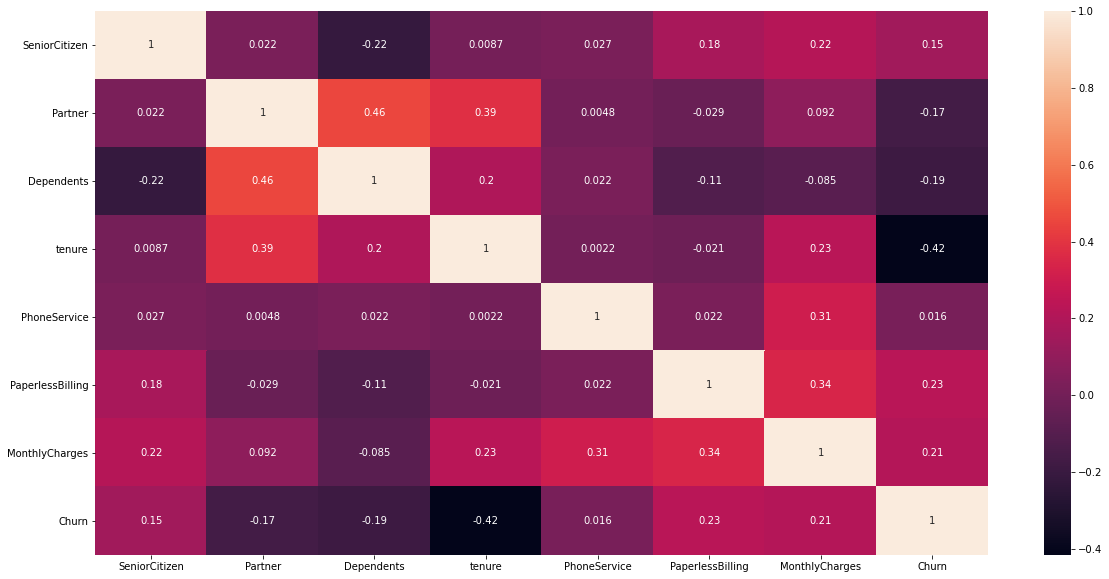

In [42]:
show_correlations(a,show_chart=False)['Churn'].sort_values(ascending=False)

#labels are removed before training the model

In [43]:
try:
    label=a['Churn']
    del a['churn']
except:
    print("label already removed")

label already removed


#creating test train split

KNeighborsClassifier
0.701 
 - - - - -  

DecisionTreeClassifier
1.0 
 - - - - -  



<AxesSubplot:ylabel='features'>

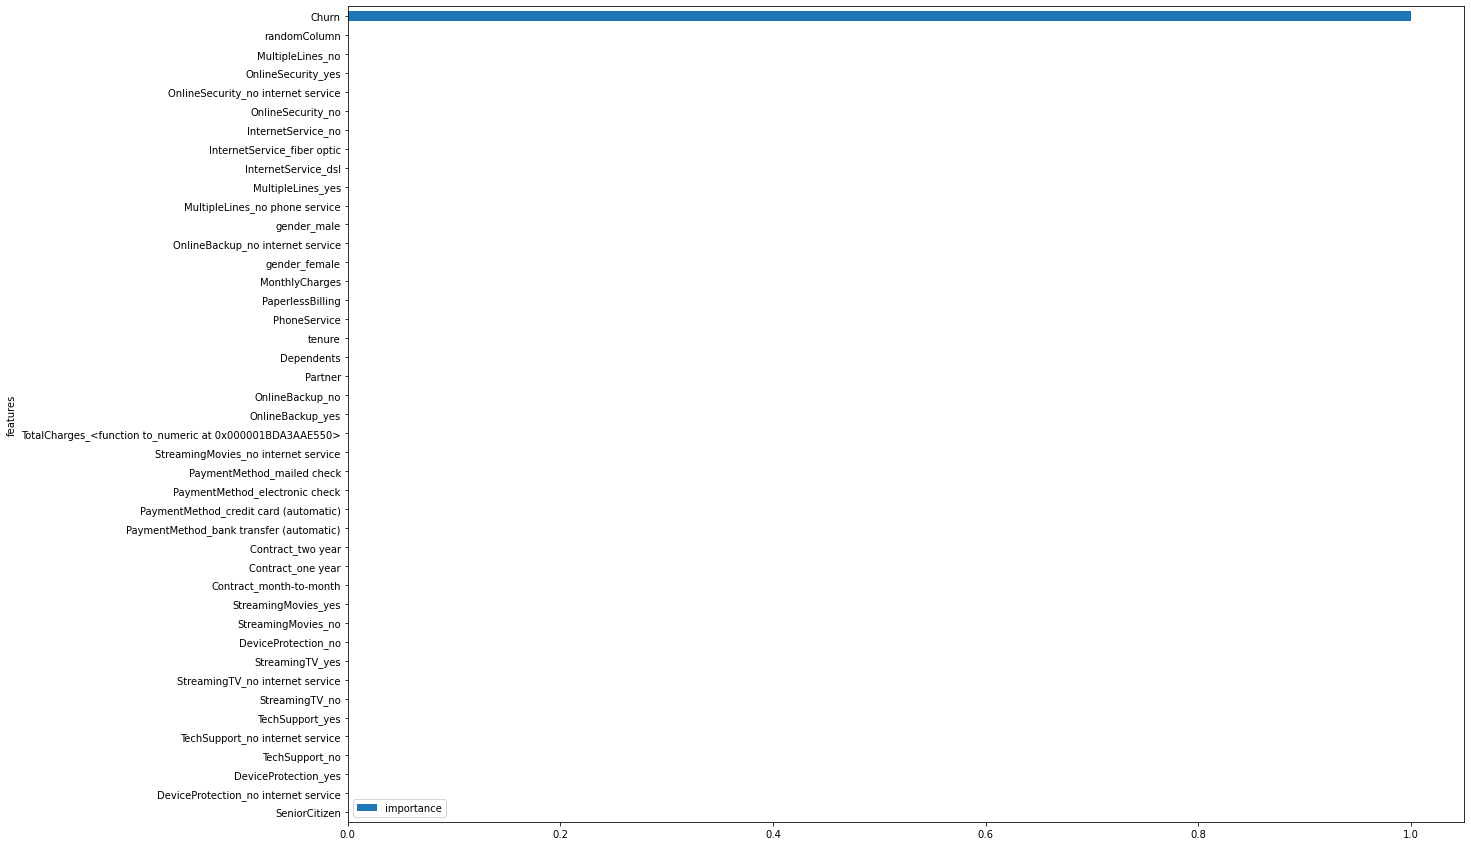

In [58]:
# Classifiers
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

classifiers = [
    KNeighborsClassifier(5),    
    DecisionTreeClassifier(max_depth=5)
]
    

# iterate over classifiers
for item in classifiers:
    classifier_name = ((str(item)[:(str(item).find("("))]))
    print (classifier_name)
    
    # Create classifier, train it and test it.
    clf = item
    clf.fit(feature_train, label_train)
    pred = clf.predict(feature_test)
    score = clf.score(feature_test, label_test)
    print (round(score,3),"\n", "- - - - - ", "\n")
    
feature_df = pd.DataFrame()
feature_df['features'] = a.columns
feature_df['importance'] = clf.feature_importances_
feature_df.sort_values(by='importance', ascending=False)    
feature_df.set_index(keys='features').sort_values(by='importance', ascending=True).plot(kind='barh', figsize=(20, 15))

Confusion matrix, without normalization
[[557   0]
 [  0 565]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


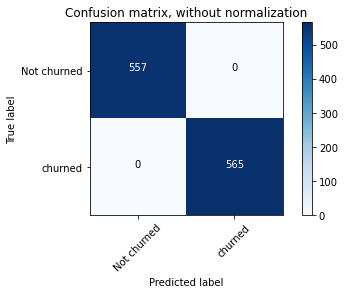

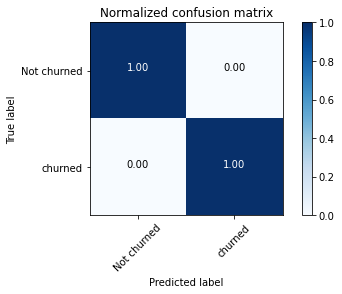

              precision    recall  f1-score   support

 Not churned       1.00      1.00      1.00       557
     churned       1.00      1.00      1.00       565

    accuracy                           1.00      1122
   macro avg       1.00      1.00      1.00      1122
weighted avg       1.00      1.00      1.00      1122



In [67]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(label_test, pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
class_names = ['Not churned','churned']

plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()


from sklearn.metrics import classification_report
eval_metrics = classification_report(label_test, pred, target_names=class_names)
print(eval_metrics)